In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# **Importing all important libraries**

In [12]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import wordcloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import os

In [14]:
os.getcwd()

'C:\\Users\\Tanvi Shinde'

# **1. Load the data into python**

In [15]:
#reading the data

df = pd.read_csv('Resume_Data.csv', encoding='latin-1')

df.head()

,Category,Resume
0,NaN,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


In [16]:
print ("Resume Categories")
print (df['Category'].value_counts())

Resume Categories
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Mechanical Engineer          40
Sales                        40
Operations Manager           40
Data Science                 39
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

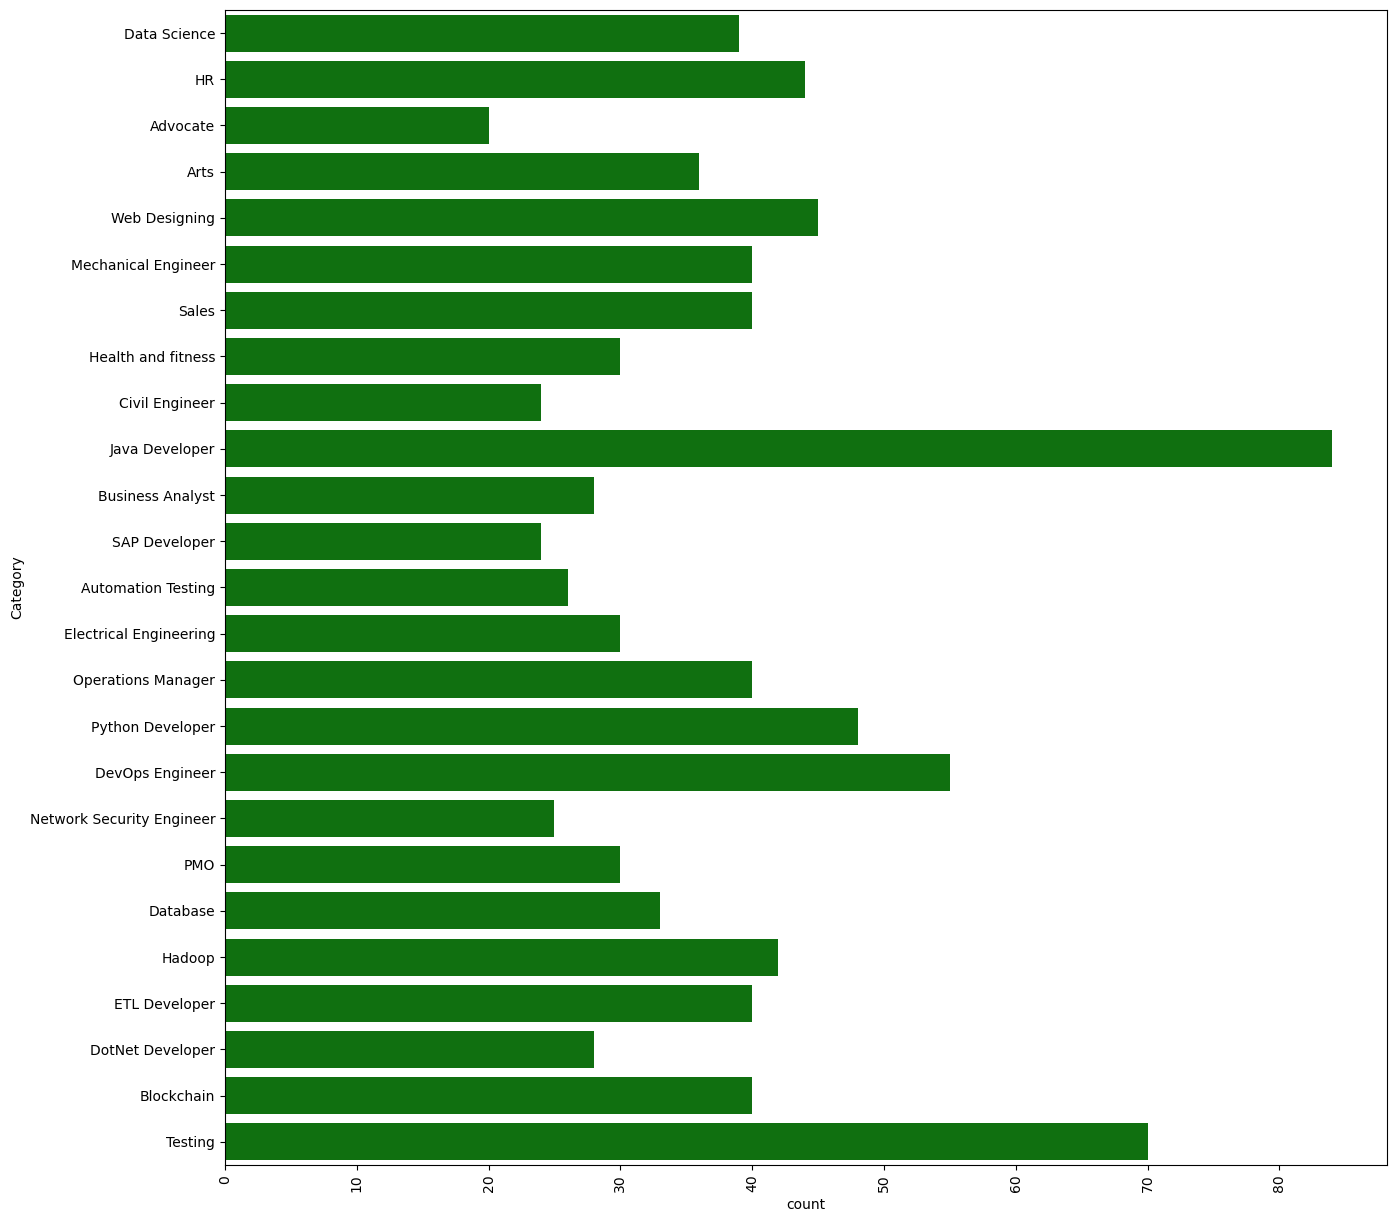

In [17]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df,color='green')

In [19]:
df["Resume"][10]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \n\nData Science Assurance Associate \n\nData Science Assurance Associate - Ernst & Young LLP\nSkill Details \nJAVASCRIPT- Exprience - 24 months\njQuery- Exprience - 24 months\nPython- Exprience - 24 monthsCompany Details \ncompany - Ernst & Young LLP\ndescription - Fraud Investigations and Dispute Servi

In [19]:
df["Resume"][200]

"Education Details \nMay 1999 to September 2002 Diploma Mechanical Engg Mumbai, Maharashtra Institute of Mechanical Engg\nMay 1998 to May 1999 Diploma Mechanical Engg. Services  ITES\nMay 1993 to May 1995   Mumbai, Maharashtra Industrial Training Institute\nSr. Executive-Mechanical Engineering- Automation & Projects Consultant \n\nSr. Executive-Mechanical Engineering- Automation & Projects Consultant - Mechanical Engineering\nSkill Details \nMicrosoft Office -Word ,Excel,Auto cad,Micro station J ERP 3d Modeling software- Exprience - 120 monthsCompany Details \ncompany - Mechanical Engineering\ndescription - Role & Responsibilities: - Application Engineering / Pre Sales & Inside Sales â?¢ Provide applications support to inside sales personnel and outside sales channels, Provide product selection and materials of construction technical recommendations.\nâ?¢ Participate in the necessary training activities to establish technical competency & also Participate in Field Service trips as dire

# **2.Cleaning and preprocessing the resume text.**

In [20]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

df['Cleaned_Resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [21]:
df.head()

,Category,Resume,Cleaned_Resume
0,NaN,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...


In [23]:
len(df)

962

In [24]:
#getting the entire resume text

corpus=" "

for i in range(0,962):
    corpus= corpus+ df["Cleaned_Resume"][i]

In [26]:
corpus[1199:2500]

'ictive coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyers review Understand the end to end flow of the solution doing research and development for classification models predictive analysis and mining of the information present in text data Worked on analyzing the outputs and precision monitoring for the entire tool TAR assists in predictive coding topic modelling from the evidence by following EY standards Developed the classifier models in order to identify red flags and fraud related issues Tools Technologies Python scikit learn tfidf word2vec doc2vec cosine similarity Na ve Bayes LDA NMF for topic modelling Vader and text blob for sentiment analysis Matplot lib Tableau dashboard for reporting MULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS USA CLIENTS TEXT ANALYTICS MOTOR VEHICLE CUSTOMER REVIEW DATA Received customer feedback survey data for past one year Performed sentiment Positive Negative Neutral and time series anal

# **3.Performing the NLP tasks on the cleaned text.**

In [27]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

#Tokenizing the text
tokens = tokenizer.tokenize(corpus)

len(tokens)

411913

In [28]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [29]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.
import nltk
nltk.download('stopwords')#without this it was showing error initially

stopwords = nltk.corpus.stopwords.words('english')

words_new = []

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in words:
    if word not in stopwords:
        words_new.append(word)

[nltk_data] Downloading package stopwords to C:\Users\Tanvi
[nltk_data]     Shinde\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [30]:
len(words_new)

318305

# Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word. Lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

In [31]:
import nltk
nltk.download('wordnet')  #without this it was showing error initially
from nltk.stem import WordNetLemmatizer

wn = WordNetLemmatizer()

lem_words=[]

for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)


[nltk_data] Downloading package wordnet to C:\Users\Tanvi
[nltk_data]     Shinde\AppData\Roaming\nltk_data...


In [34]:
len(lem_words)

318305

In [35]:
same=0
diff=0

for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1

print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 294
Number of words not Lemmatized= 1538


# **4.Finding the frequency distribution of the words**

In [36]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)

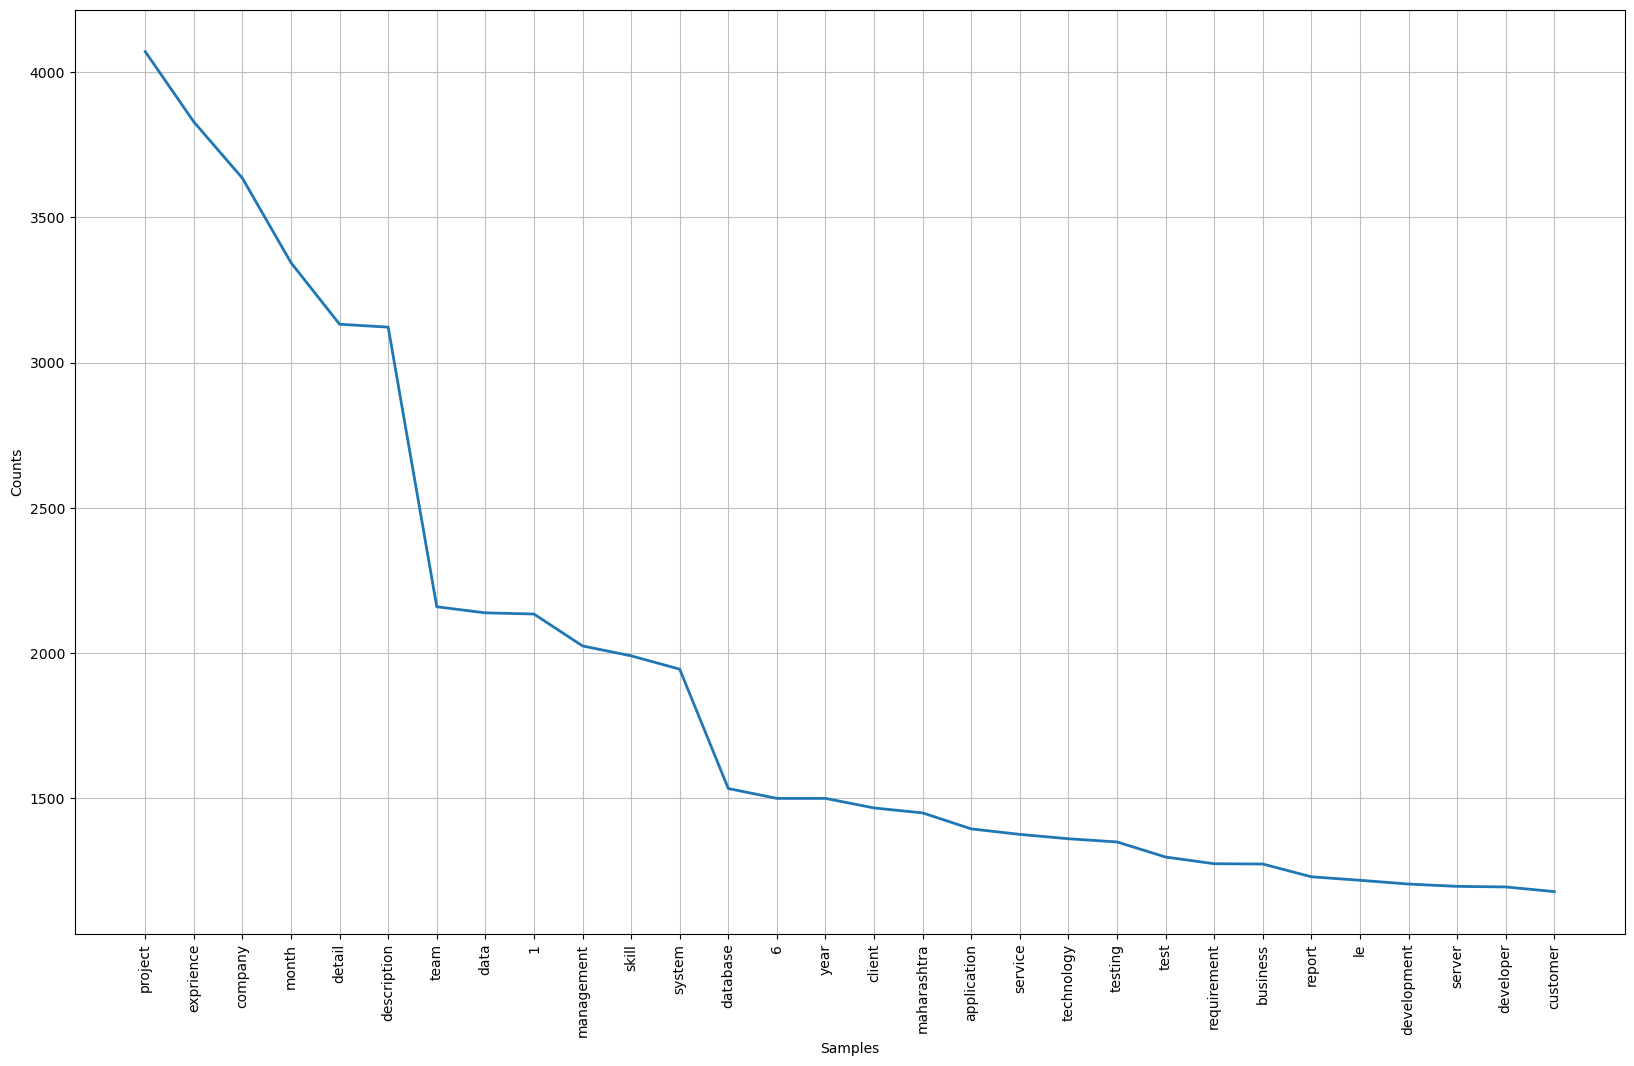

<Axes: xlabel='Samples', ylabel='Counts'>

In [37]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [38]:
len(freq_dist)

6769

In [39]:
mostcommon = freq_dist.most_common(50)

In [40]:
mostcommon

[('project', 4071),
 ('exprience', 3829),
 ('company', 3635),
 ('month', 3344),
 ('detail', 3132),
 ('description', 3122),
 ('team', 2159),
 ('data', 2138),
 ('1', 2134),
 ('management', 2024),
 ('skill', 1990),
 ('system', 1944),
 ('database', 1533),
 ('6', 1499),
 ('year', 1499),
 ('client', 1466),
 ('maharashtra', 1449),
 ('application', 1394),
 ('service', 1375),
 ('technology', 1360),
 ('testing', 1349),
 ('test', 1297),
 ('requirement', 1274),
 ('business', 1273),
 ('report', 1229),
 ('le', 1217),
 ('development', 1204),
 ('server', 1196),
 ('developer', 1194),
 ('customer', 1178),
 ('ltd', 1177),
 ('process', 1163),
 ('responsibility', 1137),
 ('using', 1124),
 ('sql', 1120),
 ('january', 1090),
 ('java', 1076),
 ('engineering', 1055),
 ('work', 1038),
 ('pune', 1026),
 ('role', 969),
 ('c', 951),
 ('user', 916),
 ('operation', 895),
 ('software', 886),
 ('pvt', 879),
 ('sale', 845),
 ('activity', 832),
 ('environment', 800),
 ('design', 786)]

# **5. Building the word cloud with the corpus.**

## **WordCloud**

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [49]:
#converting into string

res=' '.join([i for i in lem_words if not i.isdigit()])

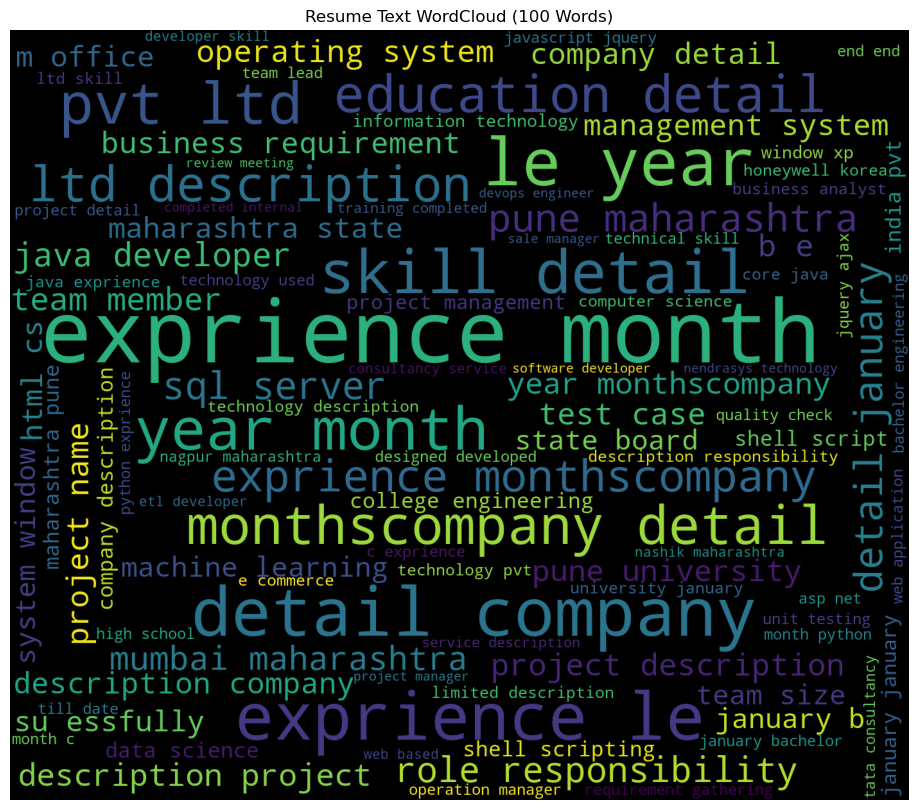

In [51]:


plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()

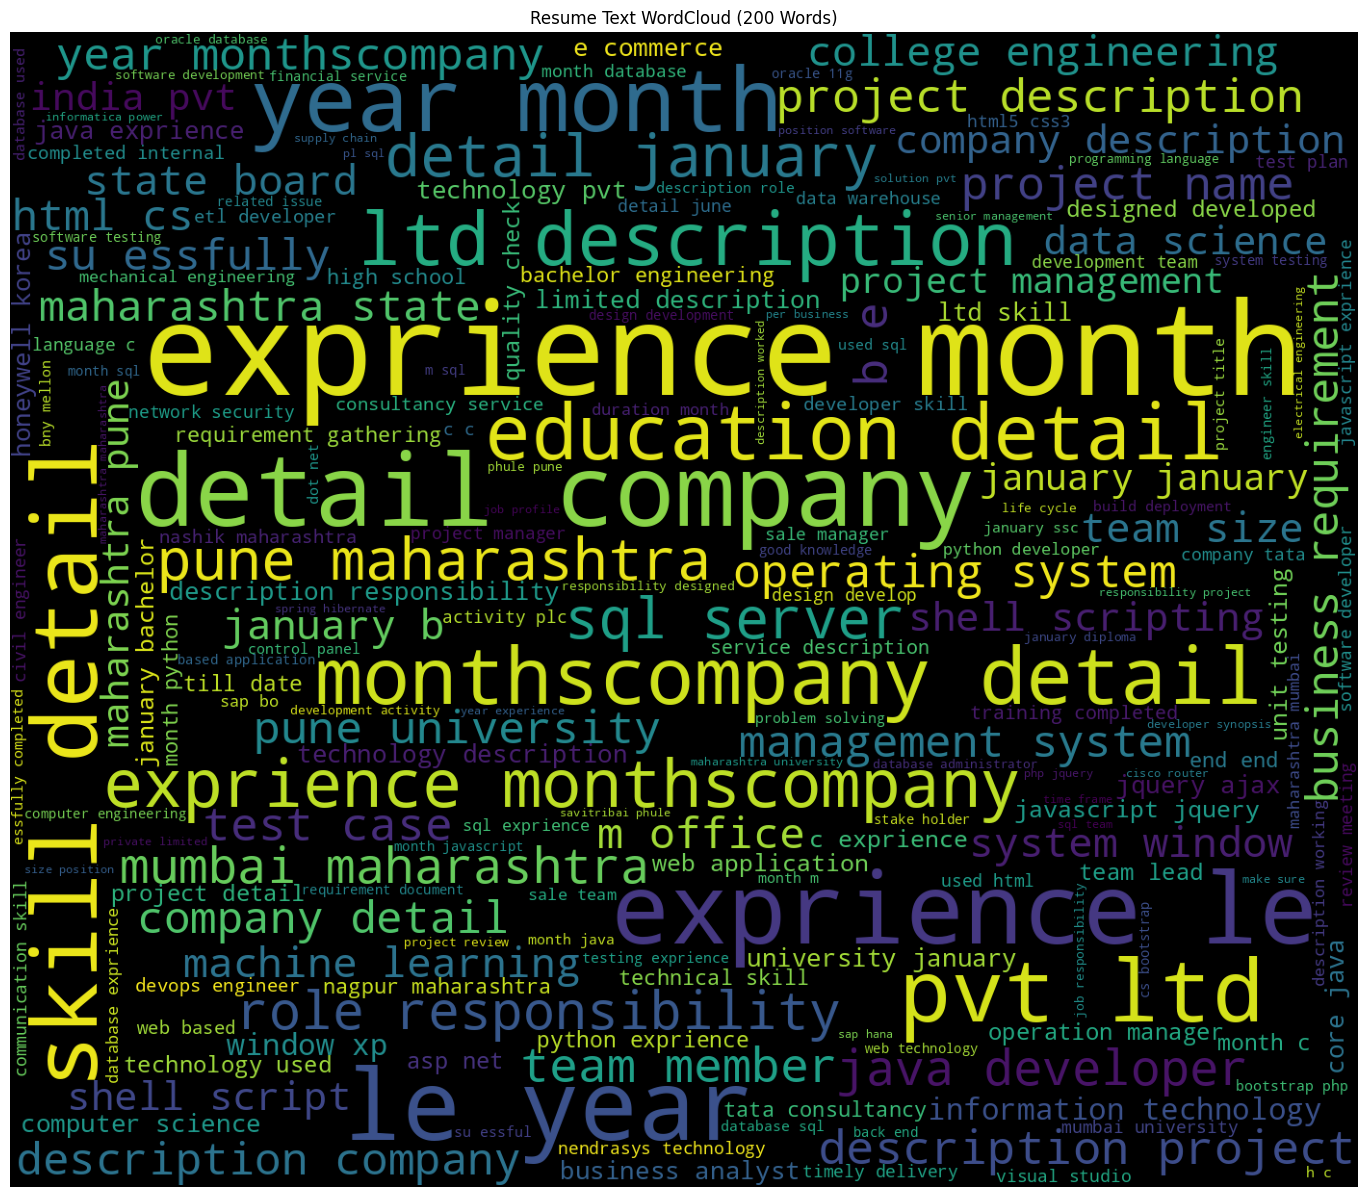

In [47]:
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (200 Words)')
plt.axis('off')
plt.show()

# **6. Filtering the resume data for a specific category of Data Science**

## **Category Analysis**

In [52]:
data_science= df[df["Category"]=="Data Science"]

In [53]:
data_science.head()

,Category,Resume,Cleaned_Resume
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",SKILLS C Basics IOT Python MATLAB Data Science...


In [54]:
len(data_science)

39

In [55]:
data_science["Cleaned_Resume"]

1     Education Details May 2013 to May 2017 B E UIT...
2     Areas of Interest Deep Learning Control System...
3     Skills R Python SAP HANA Tableau SAP HANA SQL ...
4     Education Details MCA YMCAUST Faridabad Haryan...
5     SKILLS C Basics IOT Python MATLAB Data Science...
6     Skills Python Tableau Data Visualization R Stu...
7     Education Details B Tech Rayat and Bahra Insti...
8     Personal Skills Ability to quickly grasp techn...
9     Expertise Data and Quantitative Analysis Decis...
10    Skills Programming Languages Python pandas num...
11    Education Details May 2013 to May 2017 B E UIT...
12    Areas of Interest Deep Learning Control System...
13    Skills R Python SAP HANA Tableau SAP HANA SQL ...
14    Education Details MCA YMCAUST Faridabad Haryan...
15    SKILLS C Basics IOT Python MATLAB Data Science...
16    Skills Python Tableau Data Visualization R Stu...
17    Education Details B Tech Rayat and Bahra Insti...
18    Personal Skills Ability to quickly grasp t

# **7. Creating a corpus for data science resume text**

In [56]:
data_science_corpus = " "

for index, row in data_science.iterrows():
    data_science_corpus += row['Cleaned_Resume']

In [57]:
data_science_corpus

' Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github c

In [59]:
data_science_corpus=data_science_corpus.lower()

In [60]:
words_data_science=data_science_corpus.split()

# **8. Finding the frequencies of the important skills in Data science**

In [61]:
print('Frequency of "python"  is :', words_data_science.count("python"))

Frequency of "python"  is : 170


In [62]:
print('Frequency of "statistics"  is :', words_data_science.count("statistics"))

Frequency of "statistics"  is : 4


In [63]:
print('Frequency of "analysis"  is :', words_data_science.count("analysis"))

Frequency of "analysis"  is : 76


In [64]:
print('Frequency of "sql"  is :', words_data_science.count("sql"))

Frequency of "sql"  is : 71


In [65]:
print('Frequency of "data analytics"  is :', words_data_science.count("neural"))

Frequency of "data analytics"  is : 47


In [66]:
print('Frequency of "network"  is :', words_data_science.count("network"))

Frequency of "network"  is : 12


In [67]:
print('Frequency of "networks"  is :', words_data_science.count("networks"))

Frequency of "networks"  is : 20


In [68]:
print('Frequency of "pandas"  is :', words_data_science.count("pandas"))

Frequency of "pandas"  is : 23


In [69]:
print('Frequency of "matplotlib"  is :', words_data_science.count("matplotlib"))

Frequency of "matplotlib"  is : 18


In [70]:
print('Frequency of "r"  is :', words_data_science.count("r"))

Frequency of "r"  is : 36


In [71]:
print('Frequency of "excel"  is :', words_data_science.count("excel"))

Frequency of "excel"  is : 12


In [72]:
print('Frequency of "anaconda"  is :', words_data_science.count("anaconda"))

Frequency of "anaconda"  is : 4


In [73]:
print('Frequency of "jupyter"  is :', words_data_science.count("jupyter"))

Frequency of "jupyter"  is : 4


In [74]:
print('Frequency of "education"  is :', words_data_science.count("education"))

Frequency of "education"  is : 48


In [75]:
print('Frequency of "experience"  is :', words_data_science.count("experience"))

Frequency of "experience"  is : 52


In [76]:
print('Frequency of "numpy"  is :', words_data_science.count("numpy"))

Frequency of "numpy"  is : 23


In [77]:
print('Frequency of "tableau"  is :', words_data_science.count("tableau"))

Frequency of "tableau"  is : 45


In [78]:
print('Frequency of "powerbi"  is :', words_data_science.count("powerbi"))

Frequency of "powerbi"  is : 0


In [79]:
print('Frequency of "deep learning"  is :', words_data_science.count("deep learning"))

Frequency of "deep learning"  is : 0


In [80]:
print('Frequency of "machine Learning"  is :', words_data_science.count("machine Learning"))

Frequency of "machine Learning"  is : 0


In [81]:
print('Frequency of "ML"  is :', words_data_science.count("ML"))

Frequency of "ML"  is : 0
